## Player Statistics Correlation

First we need the necessary imports

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

Open the .csv file and clear out anything but statistics


In [ ]:
stats = pd.read_csv('/Users/attu3/OneDrive/Desktop/Predicting-NBA-Players-Salary/NBA Player Stats v1.1.csv')
stats['Salary'] = stats.Salary.str.split(',').str.join('').astype(int)
stats.drop(stats.columns[[0, 1]], axis=1, inplace=True)
stats = pd.DataFrame(stats)
stats.columns
stats.head(n=6)

Create correlation matrix

<AxesSubplot:title={'center':'Correlation Player Statistics'}>

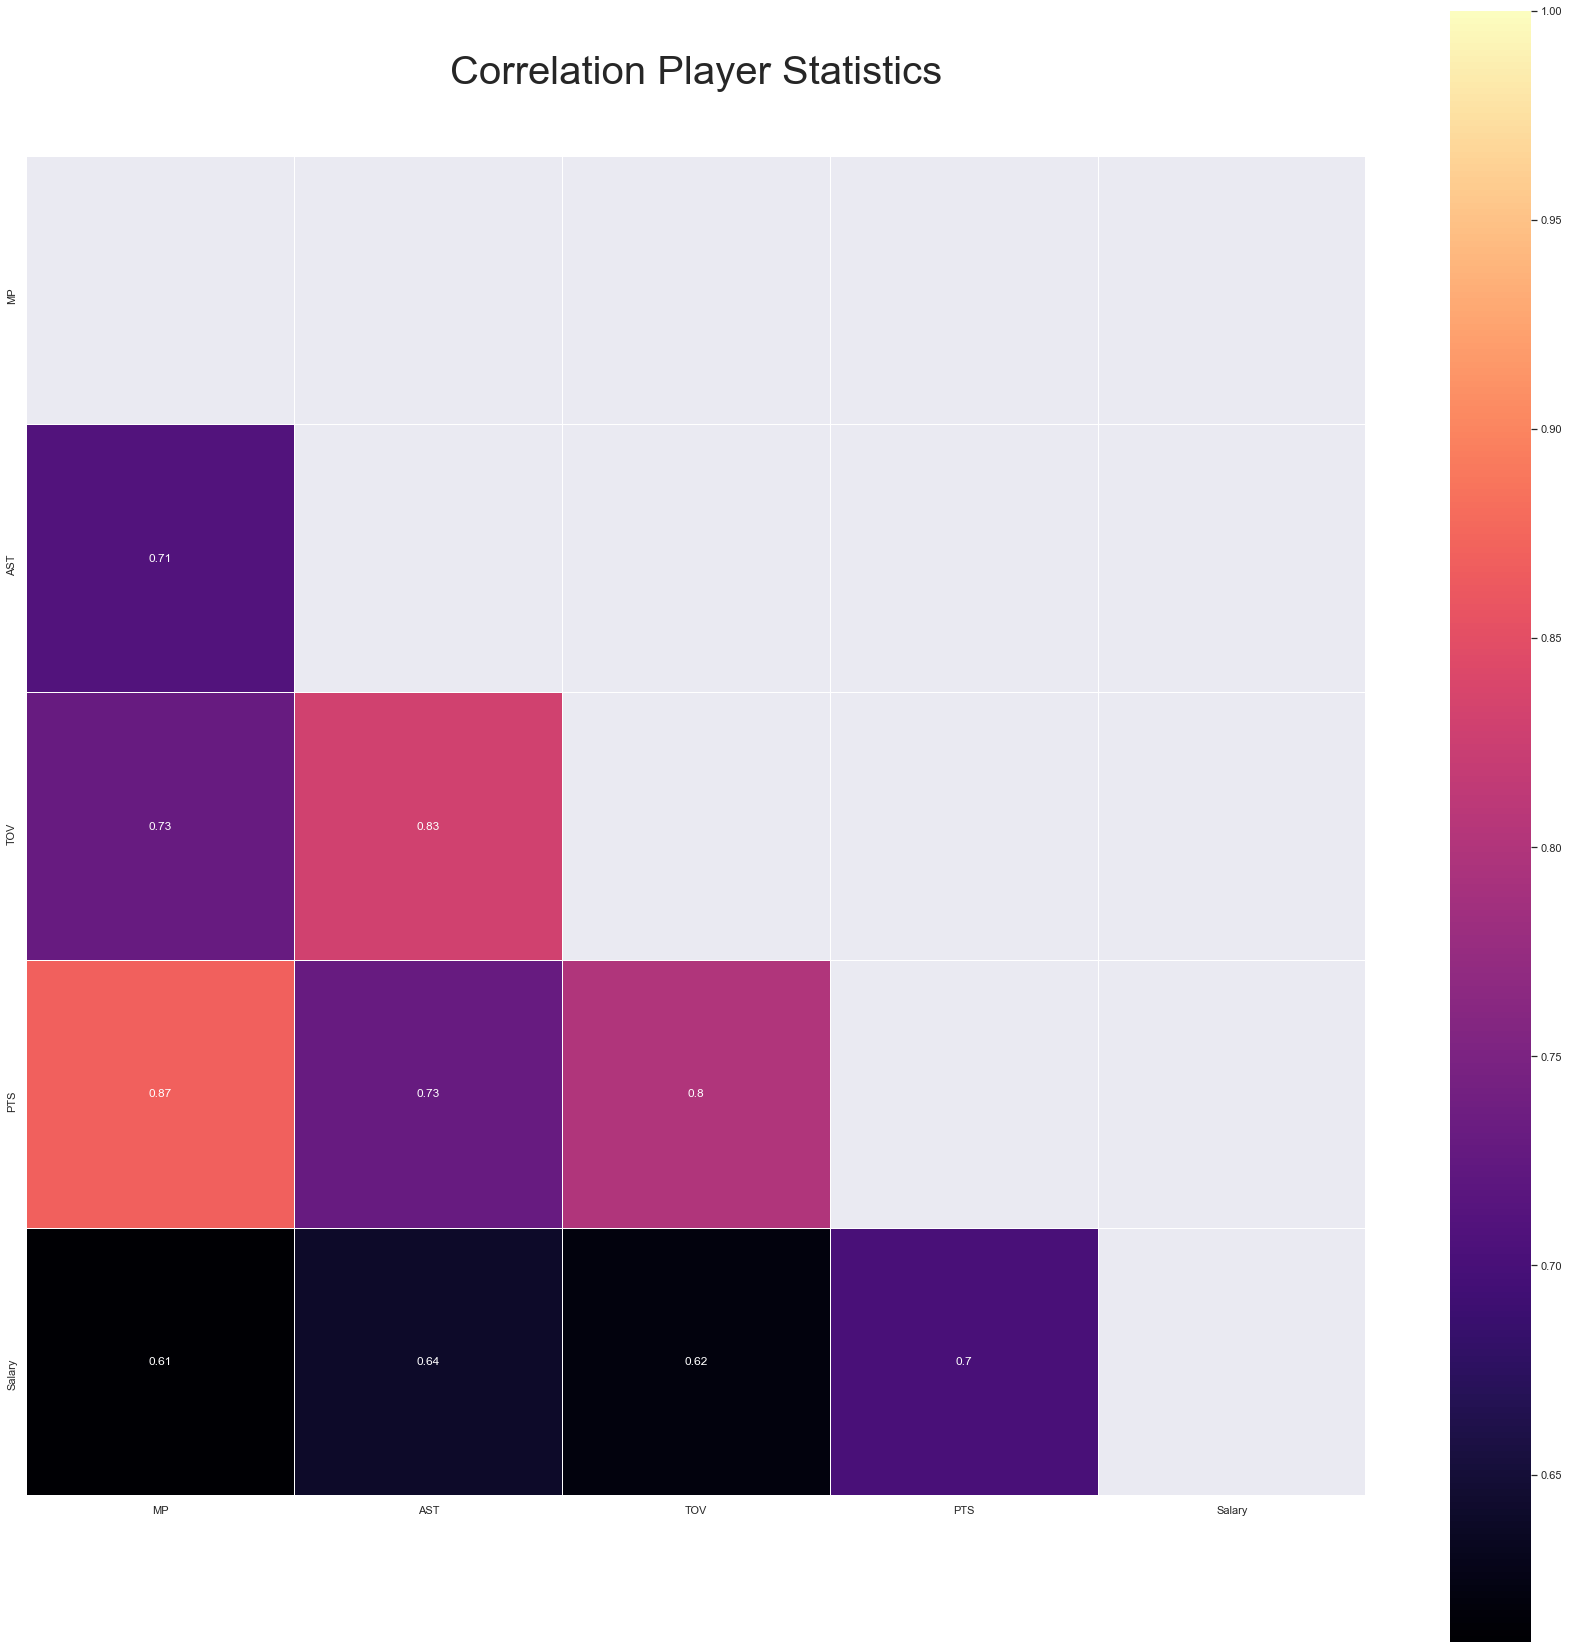

In [9]:
# set color palette and size of map
colormap = plt.cm.magma
sns.set(font_scale = 1)
plt.figure(figsize=(30, 30))

plt.title('Correlation Player Statistics', y = 1.05, size = 40)

corr = stats.astype(float).corr().round(2)
mask = np.zeros_like(corr, dtype=bool)

mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [4]:
#identify features that are highly correlated (0.6 >)
salary_corr = abs(corr["Salary"])
pos_corr = salary_corr[salary_corr > (0.6)]
#drop features that are less correlated(<0.6)
stats.drop(['GS','G','TRB','STL', 'BLK'], axis=1, inplace=True)
pos_corr

MP        0.61
AST       0.64
TOV       0.62
PTS       0.70
Salary    1.00
Name: Salary, dtype: float64

In [5]:
#test(20%) and train(80%)
x = stats.drop("Salary", 1)
print(x)
y = stats["Salary"]
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

       MP  AST  TOV   PTS
0    27.7  3.2  1.9  12.4
1    17.8  1.9  1.0   7.2
2    14.5  0.5  0.5   4.7
3    14.8  0.8  0.8   6.7
4    27.9  3.4  1.0  14.2
..    ...  ...  ...   ...
450  18.4  1.3  0.8   6.6
451  14.5  0.8  0.4   4.4
452  35.1  4.9  3.5  27.4
453   9.5  0.2  0.2   3.2
454  33.2  3.7  2.7  27.0

[455 rows x 4 columns]


In [10]:
#Linear Regression to Predict Salary
reg = LinearRegression()
reg.fit(x_train, y_train)
y_prediction = reg.predict(x_test)

In [7]:
#Find R squared value to interpret regression 
r2_score(y_test, y_prediction)

0.5969246358948748

In [12]:
mae = mean_absolute_error(y_test, y_prediction)
print(mae)

4318229.546937237


Text(0.5, 1.0, 'Actual Values vs Predicted Values')

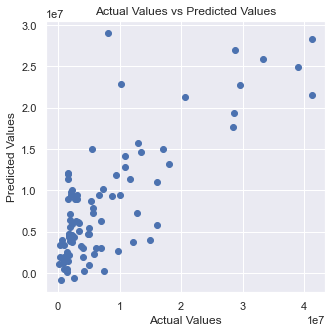

In [13]:
#plot predicted values and actual values
plt.figure(figsize = (5,5))
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')